In [1]:
!pip install Pillow

In [2]:
!pip install opencv-python

# Curso de Computacional II

## Machine Learning NO supervisado

Machine Learning es la forma en como aprende una máquina.
Según si el proceso es supervisado o no. Para la parte *supervisada*, una persona crea un algoritmo, un modelo, que según ciertos ajustes y técnicas, la máquina pueda clasificar una nueva entrada dentro de unas ya existentes. O sea capaces de tener predicciones del comportamiento de las variables según los datos registrados por el usuario.




### Machine learning NO supervisado ###

En el Machine learning no supervisado, se ingresa datos, la máquina no sabe de qué son esos datos puesto que no tienen una etiqueta. Ahí se tiene una bolsa con un montón de partículas de diferente tamaño (valor). Entonces, lo que hace el modelo que implementemos será organizar los datos según cuanto se parezcan. Al igual que en la bolsa de pelotas, ellas se van a tender a reorganizar según el tamaño (más pequeñas se filtran por las grandes y terminan en el fondo). Entonces los modelos que se construyen se hacen a fin de especificar una **densidad** para el conjunto de datos.

**¿Cuál será el flujo de trabajo?**
1. Plantear el problema
2. Adquirir los datos
3. Análisis Exploratorio de datos (usando Pandas)
4. Modelado
5. Validación
6. Interpretabilidad

En el **Supervisado** para las regresiones: regresiones multilineales, Ridge y Lasso; Regresión Logística, Regresión lineal con función sigmoide.

En el **No supervisado** se puede usar: Uno vs todos-Uno vs el resto; K-Vecinos Cercanos; Maquinas de Soporte Vectorial; Árboles de Decisión; Métodos de ensamble: Boobting, Bagging, Random Forest y Stacking.

Se medía lo acertado que estaban los modelos según las siguientes métricas: Recall; Precision; F1; AUC, curva ROC; Matriz de confusión.

## Tema 1: Visión Computacional ##

**¿Qué es una image?**
Una imagen tiene N número de pixeles de forma horizontal, y M número de pixeles de forma vertical. Además un pixel es un pixel según la cantidad de color que tiene del R(Red) G(Green) B(Blue).
Por tanto las componentes X y Y dan la coordenada (en la imagen) de un píxel en particular. Mientras que la componente Z es un valor de la componente RGB. 

Una imagen a color es un campo escalar, donde cada punto tiene un valor de intensidad, un color.
Cada pixel de la imagen puede contener 2^n valores distintos de color. Es decir, la imagen se contruye con pixeles donde cada uno puede elegir un número dentro de esos 2^n valores. Por ejemplo: si puedo tener 8 bites por pixel, cada pixel puede tomar valores dentro del rango de 0 hasta 2^8, i.e, 256.  

**¿Qué se está haciendo al normalizar una imagen al rango [0,1]?**
Está haciendo que el punto más oscuro se vuelva negro, y el más claro, se vuelva el más luminoso posible.

*Es posible encontrar un isomorfismo entre cada campo F y cada campo E, es posible traducir cualquier campo escalar de la física a una imagen (de profundidad arbitraria)* No entendí.

## Imágenes y álgebra-cálculo ##

1. ¿Qué es una Forma Lineal? Es una operación lineal, que hace que un espacio vectorial, se convierta el un elemento de un espacio escalar. El espacio dual E* es el espacio vectorial donde están todas esas formas lineales. Cuántica: kets (elelemtos del espacio vectorial E), bras formas lineales.
2. Tensor: una matriz cúbica.
3. Una imagen es un tensor de rango 3. La primera matriz es la de los Rojos, la del medio la de los verdes G, la tercera, la de los azules, B.
4. Con esa definición de imagen como un tensor, se pueden aplicar todas las operaciones tensoriales.

# Preprocesamiento de Imágenes #

**¿Qué es aplanar una imagen?**
Es convertir esa matriz-imagen a un vector columna.

## Transformaciones de pixeles ###

**Negativo de una imagen**: $g_{i,j}=255-f_{i,j}$, así se reversa los colores de la imagen.
**Contraste y brillo**: $g_{i,j}=\alpha f_{i,j}+\beta$. Con: $\alpha$, el control de contraste. Y $\beta$, el control de brillo.
Todos esos cambios se evidencian en los histogramas de las imágenes.
**Thresholding an image (Umbralizado)**: se le asigna 255 si es mayor de cierto umbral, y se deja negro si no.

*'**equalización del histograma**: uso del histograma para ajustar brillo y contraste*


Estas transformaciones de pixeles, son transformaciones de intensidades.

## Transformaciones geométricas ##
1. **Escalado**: $x'=ax$ Lo que hace es cambiar la escala de la imagen (agrandar, empequeñecer).
2. **Corrimiento**: $x'=x+t_x$ Lo que hace es desplazar la imagen.
3. **Cizallado**: $x'=by$
4. **Rotación**: $\begin{bmatrix}
\cos(\theta) & \sin(\theta) \\
-\sin(\theta) & \cos(\theta)
\end{bmatrix}$ Lo que hace es rotar la imagen

Entonces, una transformación afín, lo que hace es $f(x,y)\to g(x',y')$

## Convolución ##
### Filtro ###
Un filtro es una malla de cierta dimensionalidad cuadrada. Cada cuadro de esa malla posee un valor que depende de la posición que ocupe (coordenadas $i,j$). Entonces una función $f(i,j)$ va a dar el valor o el peso, de ese cuadrito.

De manera que mi malla va a tener cuadritos con pesos (importancia) diferente. 

Si quisiera que los pixeles de mi imagen estuvieran pesados por ese filtro, lo que debería hacer sería aplicar el filtro en cada pixel de mi imagen. Para hacerlo se utiliza la operación convolución.
Como resultado tendré una nueva imagen, con los pixeles pesados según la función  $f(i,j)$. Por ejemplo, si quiero suavizar la imagen, podría perder información de algunos pixeles. Así $f(i,j)$ podría ser una función gausianna. De esa manera, en el filtro, el cuadro de mayor importancia sería el del centro, y a medida que r>.., entonces el cuadro pierde importancia. Al aplicar eso en mi imagen usando la convolución, podré tener una imagen con menos información. Que es el quit del [SIFT](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform) para encontrar puntos de interés en una imagen.

[Aquí algunos ejemplos de filtros](https://www.ellaberintodefalken.com/2019/10/vision-artificial-redes-convolucionales-CNN.html)

## Histograma de gradientes orientados ##

Yo tengo una imagen, y se puede trazar gradientes, desde zonas claras, a zonas oscuras. De esa manera, al tener una imagen de gradientes, puedo reemplazar los pixeles con flechas. Aplicado esto a CADA uno de lso pixeles es muy costoso, pero puedo elegir zonas, y muestra la zona de mayor densidad de gradientes (suma vectorial). Esto hace que se encuentre la estructura básica de la imagen (excelente para rostros). Se genera un histograma para cada zona seleccionadas.

## Ejemplos de procesamientos de imágenes ##

In [12]:
import cv2 # Importa Open CV
from PIL import Image, ImageOps, ImageFilter #importa esos módulos de Pillow

import os #relacionado con las rutas del computador
import numpy as np
import matplotlib.pyplot as plt

1. ### Importar imágenes con Pillow ###

In [9]:
my_image = "rostro.png"# Asocio a la imagen una variable. Es muy importante las comillas y la extensión
cwd = os.getcwd() #a la dirección de donde se está trabajando, en este caso sería el directorio de trabajo de Jupyter Notebook
image_path = os.path.join(cwd, my_image)#concatena el directorio de trabajo, con la direccipn de la imagen.
image_path #Muestra la ruta en donde está la imagen. Esto es para el programa, no para nosotros.

'C:\\Users\\belky\\rostro.png'

Esa línea 3 me dió problemas, entonces puse la imagen en la misma dirección del cirectorio. Quizá sea una forma para arreglar un futuro prolema similar.

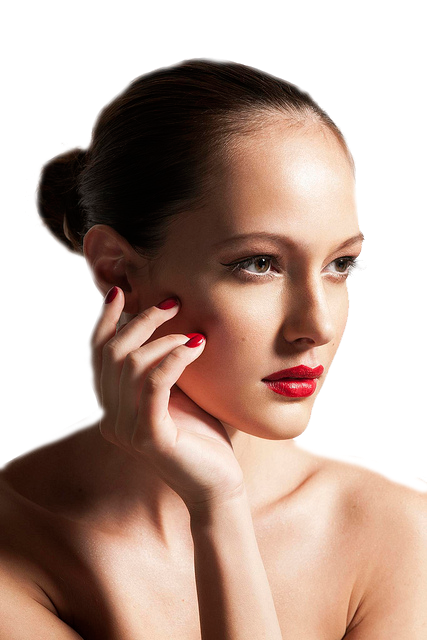

In [16]:
image = Image.open(my_image)#Forma de abrir una imagen con Pillow 
type(image) #tipo de dato
image #Forma de visualizar una imagen con Pillow , si no se está en jupyter, se usa
        #image.show()

2. **¿Cómo ver el modo de la imagen y su tamaño?**
El modo hace referencia al código de colores: RGB,BGR, y otros.
El tamaño se trata de sus dimensiones (largo, y ancho)

In [17]:
print(f'El modo de la imagen es {image.mode}. El tamaño es {image.size}')

El modo de la imagen es RGBA. El tamaño es (427, 640)


3. El método *Image.open()* únicamente abre la imagen, y muestra cosas importantes, como el tipo de archivo, el modo, la imagen. Pero no la carga a la memoria. 

    El método **image.load()** permite INGRESAR a los pixeles de la imagen. Para cuando terminemos, se puede **guardar** con: **image.save('Nombrenuevo')**

In [28]:
imag=image.load() #Vuelvo la imagen como un objeto alterable
print(type(imag)) #imag esa ruta de acceso a los pixeles
imag[350,210] #Me da los valores de R rojo, G Verde, B Azul, A alpha (opacidad) 
            #del pixel (x=350, y=640)

<class 'PixelAccess'>


(249, 222, 196, 255)

Para este ejemplo, los **canales** R,G,B,A tienen los valores 249, 222, 196, 255.

## Convertir una imagen a escalas de grises ##

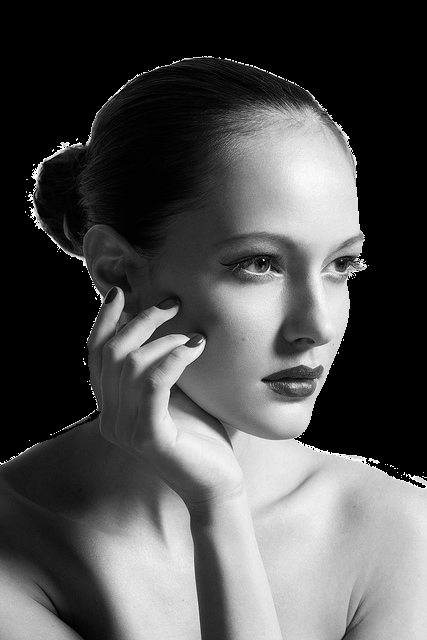

In [33]:
image_gris=ImageOps.grayscale(image)
image_gris

**Modo de una imagen en escalas de grises**

In [34]:
print(f'El modo de una imagen en escalas de grises es {image_gris.mode}')

El modo de una imagen en escalas de grises es L


## Cuantificación de una imagen ##

La Cuantificación, involucrada en el procesamiento de imagen, es una técnica de [compresión con pérdida ](https://es.wikipedia.org/wiki/Algoritmo_de_compresión_con_pérdida) (representar una cantidad de información con la menor de esa información. Representar algo mediante una aproximación)que consiste en comprimir un rango de valores a un único valor. Cuando el número de símbolos discretos en un flujo dado se reduce, el flujo se vuelve más comprensible. Por ejemplo, reducir el número de colores requeridos para representar una imagen digital, hace posible reducir el tamaño de su archivo.

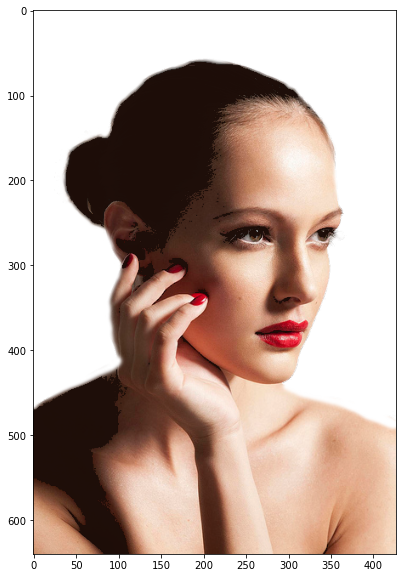

In [59]:
plt.figure(figsize=(10,10)) #Lo que sea que vaya a grficar
            #lo hace con el tamaño indicado
plt.imshow(image) #Poner la imagen dentro de el grid de graficación

La cuantización de color lo que hace es poner cuandos colores quiero yo que sea representada mi imagen.
El método **image.quantize(k)** permite que mi imágen sea representada por k colores.
Si quisiera que estuviera cuantizada según la **Profundidad del Color**, una función muy útil sería:
$K=256//2^n$
Siendo n, el número  de bits por pixel.

El nivel de cuantización de esta imagen es 2. Es decir, se usan 2 colores en la imagen 


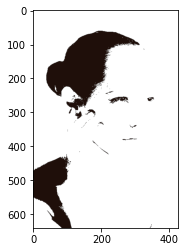

In [72]:
s=256//2**7
figure=image.quantize(s)
plt.imshow(figure)

print(f'El nivel de cuantización de esta imagen es {s}. Es decir, \
se usan {s} colores en la imagen ')


32

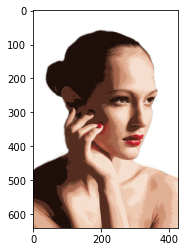

In [73]:
s=256//2**3
figure=image.quantize(s)
plt.imshow(figure)
s